# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [ ]:
#read the data
data_path = 'https://raw.githubusercontent.com/medobasha/colab/main/CC%20GENERAL.csv'
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)
df

The shape of the dataset is: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#CHECKING NULL VALUES which is there is 3.55 is null in 'MINIMUM_PAYMENTS'
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
# feel free to investigate what you want
##see if there is duplication
df.duplicated().sum()

0

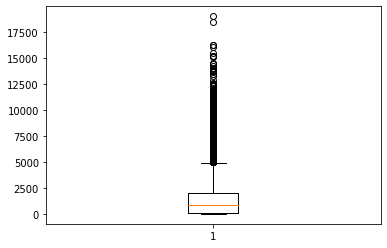

In [ ]:
plt.boxplot(df['BALANCE']);

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

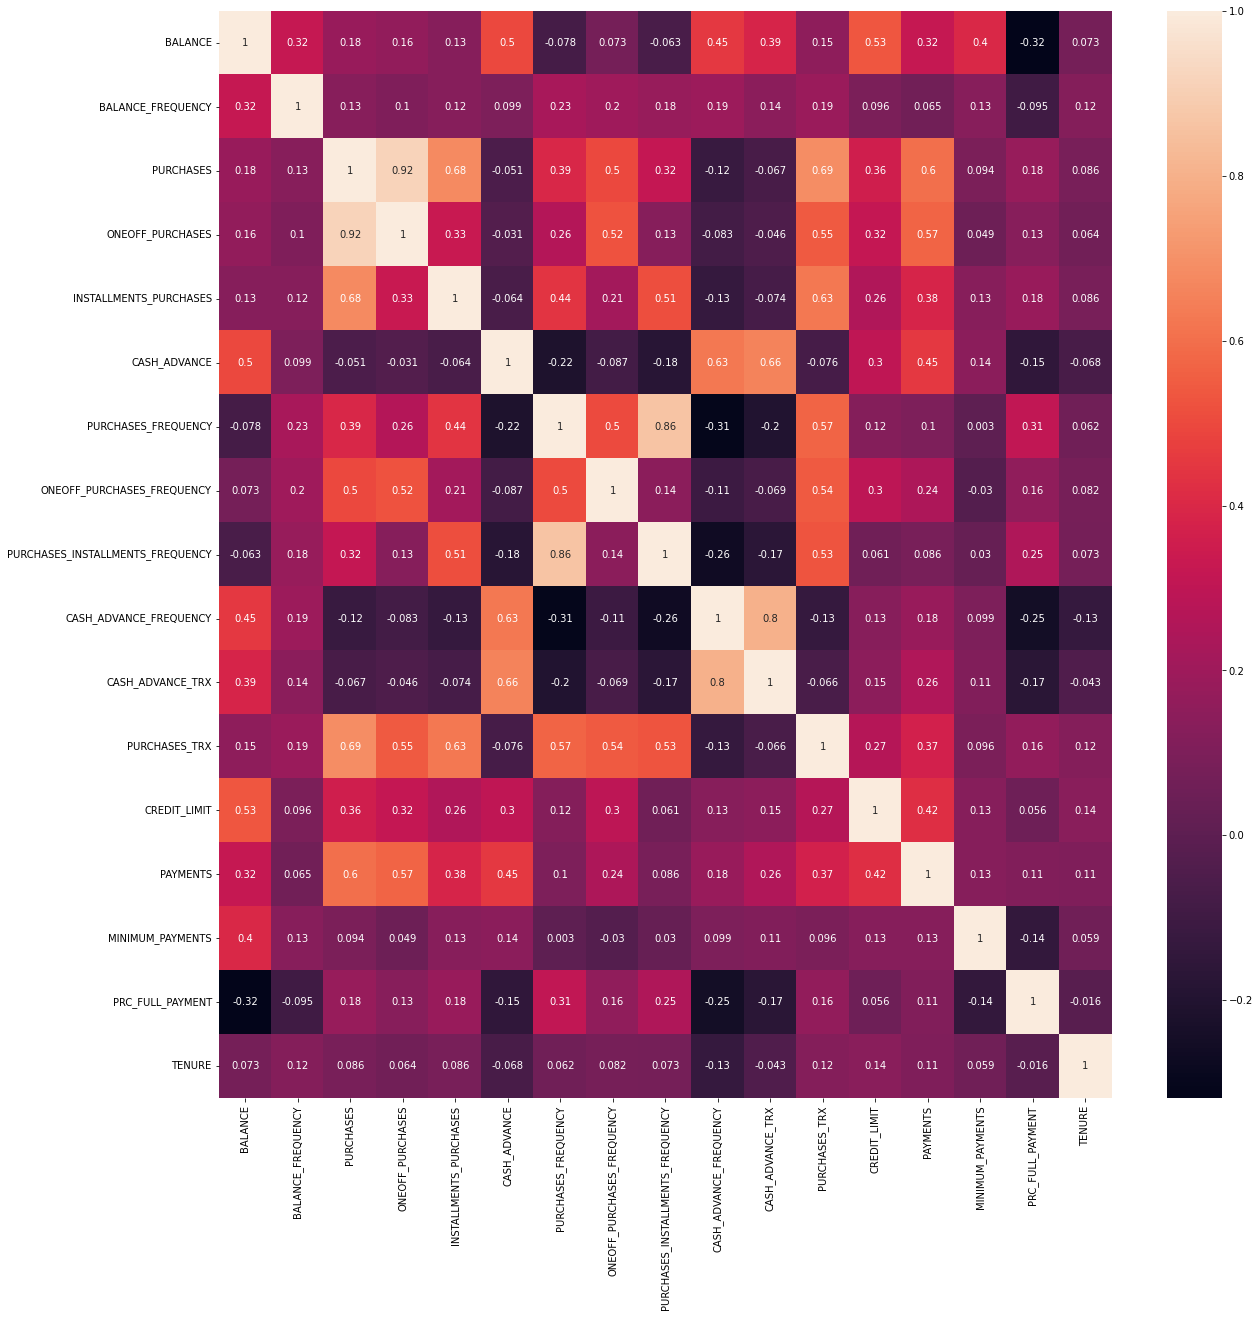

In [ ]:
plt.figure(figsize=(20,20))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a31229cd0>,
      dtype=object)

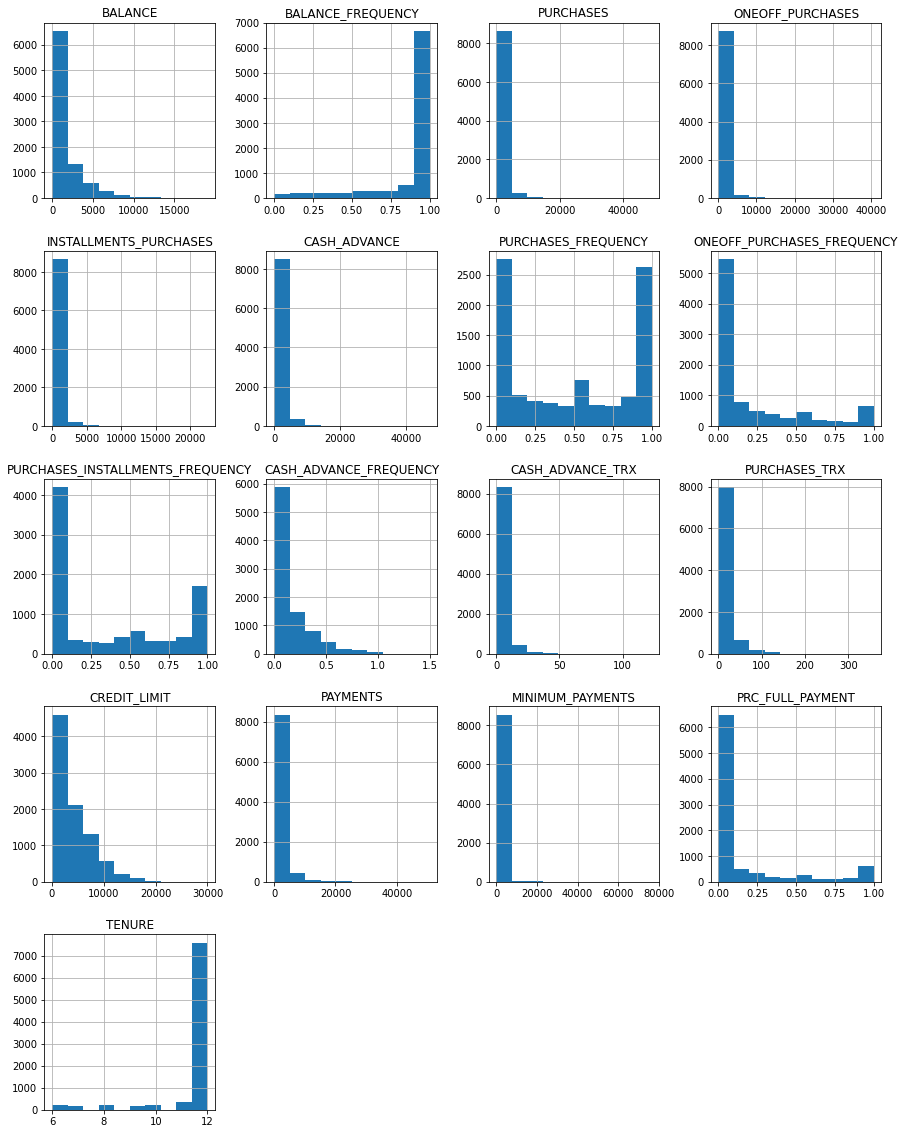

In [ ]:
df.hist(figsize = (15,20))

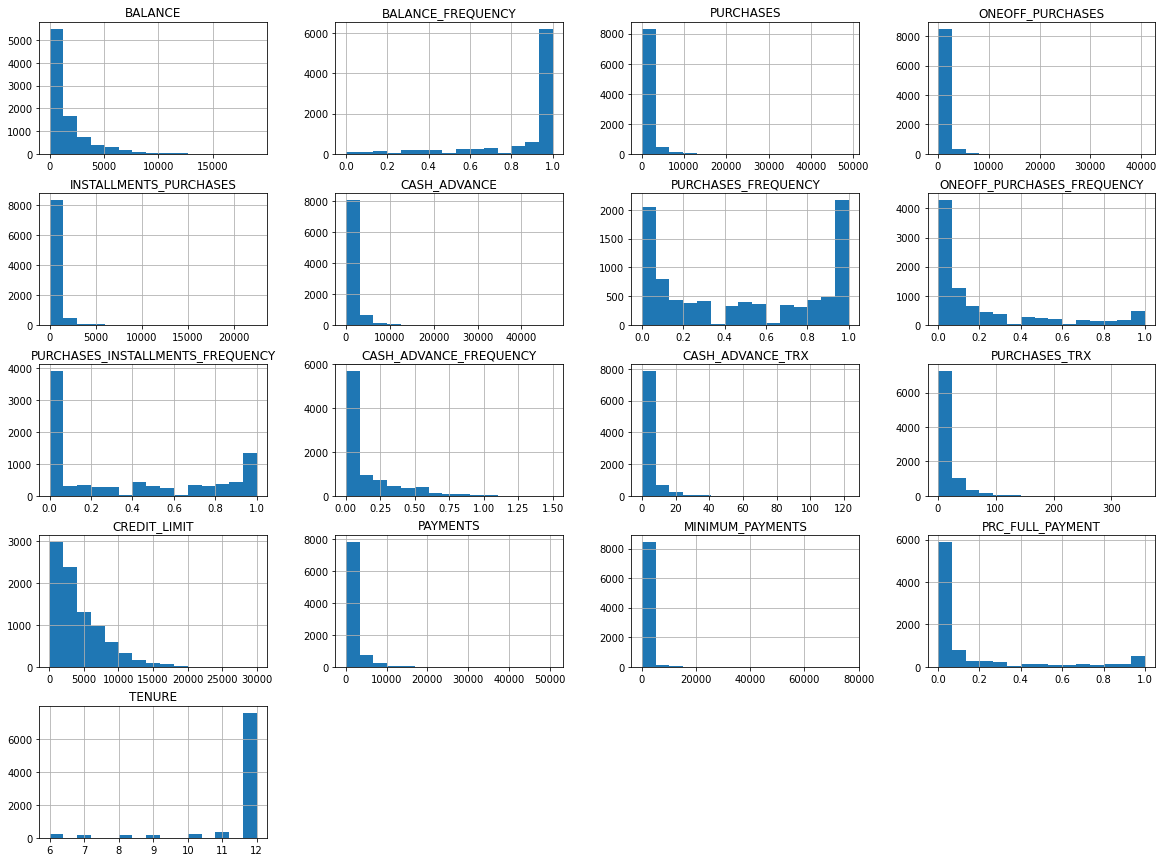

In [ ]:
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-   Handle Nulls        <br>
2-    Set cust_ID as index instead of dropping this feature     <br>
3-      Scaling to have same range    <br>
4- clamping outliers <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()
df_copy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
df_copy.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#we filled the null values with mean values
#My solution
df_copy.fillna(df.mean(axis = 0) , axis = 0 , inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#test 
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**

In [ ]:
#solution (dropping columns)
## separating the categorical features and numerical features again
num_cols = list(set(df_copy.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(df_copy.columns.to_list()) - set(num_cols) - set(['Id']))

# inspecting the correlation between each couple of features
num_cols_wthout_response_variable = list(set(num_cols) - set(['PURCHASES']))
corr_matrix = df_copy[num_cols_wthout_response_variable].corr()
corr_matrix

,PURCHASES_FREQUENCY,TENURE,CASH_ADVANCE_TRX,PAYMENTS,PURCHASES_TRX,BALANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,CREDIT_LIMIT,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY
PURCHASES_FREQUENCY,1.000000,0.061506,-0.203478,0.103464,0.568430,-0.077944,0.442418,-0.215507,0.264937,0.862934,0.305802,-0.308478,0.002976,0.119778,0.229715,0.501343
TENURE,0.061506,1.000000,-0.043421,0.106136,0.121874,0.072692,0.086143,-0.068312,0.064150,0.073275,-0.016486,-0.133372,0.057257,0.139034,0.119776,0.082466
CASH_ADVANCE_TRX,-0.203478,-0.043421,1.000000,0.255278,-0.066157,0.385152,-0.073999,0.656498,-0.046212,-0.169207,-0.169784,0.799561,0.109185,0.149699,0.141555,-0.069088
PAYMENTS,0.103464,0.106136,0.255278,1.000000,0.370832,0.322802,0.384084,0.453238,0.567292,0.085551,0.112138,0.183192,0.125046,0.421852,0.065008,0.243537
PURCHASES_TRX,0.568430,0.121874,-0.066157,0.370832,1.000000,0.154338,0.628108,-0.075850,0.545523,0.529975,0.162066,-0.131168,0.095858,0.272877,0.189626,0.544869
BALANCE,-0.077944,0.072692,0.385152,0.322802,0.154338,1.000000,0.126469,0.496692,0.164350,-0.063186,-0.318959,0.449218,0.394282,0.531267,0.322412,0.073166
INSTALLMENTS_PURCHASES,0.442418,0.086143,-0.073999,0.384084,0.628108,0.126469,1.000000,-0.064244,0.330622,0.511351,0.182569,-0.132318,0.131687,0.256496,0.124292,0.214042
CASH_ADVANCE,-0.215507,-0.068312,0.656498,0.453238,-0.075850,0.496692,-0.064244,1.000000,-0.031326,-0.177070,-0.152935,0.628522,0.139223,0.303983,0.099388,-0.086754
ONEOFF_PURCHASES,0.264937,0.064150,-0.046212,0.567292,0.545523,0.164350,0.330622,-0.031326,1.000000,0.127729,0.132763,-0.082628,0.048597,0.319721,0.104323,0.524891
PURCHASES_INSTALLMENTS_FREQUENCY,0.862934,0.073275,-0.169207,0.085551,0.529975,-0.063186,0.511351,-0.177070,0.127729,1.000000,0.250087,-0.262958,0.029590,0.060752,0.176079,0.142329


In [ ]:
cat_cols

['CUST_ID']

In [ ]:
# make cust_id as an index
df_copy = df_copy.set_index("CUST_ID")
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


## we didn't drop cust_ID we made it as an index which is better

In [ ]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [ ]:
#third issue
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler1 = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(Scaler1.fit_transform(df_copy) , columns=df_copy.columns)

In [ ]:
#test
print(Scaler1.data_min_)
print(Scaler1.data_max_)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 5.0000e+01 0.0000e+00 1.9163e-02 0.0000e+00 6.0000e+00]
[1.90431386e+04 1.00000000e+00 4.90395700e+04 4.07612500e+04
 2.25000000e+04 4.71372118e+04 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.50000000e+00 1.23000000e+02 3.58000000e+02
 3.00000000e+04 5.07214834e+04 7.64062075e+04 1.00000000e+00
 1.20000000e+01]


### Fourth Issue

In [ ]:
# IQR method to clamp outliers
def clamping(train_data , num_cols):
    
    for i in num_cols:
        Q1 = np.percentile(train_data[i], q = 25, interpolation = 'midpoint')
        Q3 = np.percentile(train_data[i], q = 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        
        Upper_Bound = Q3 + (1.5 * IQR)
        Lower_Bound = Q1 - (1.5*IQR)
        train_data.loc[train_data[i] > Upper_Bound , i] = Upper_Bound
        train_data.loc[train_data[i] < Lower_Bound , i] = Lower_Bound
    return train_data

df = clamping(df , num_cols)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,2784.434061,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.722223,1499.00,1442.45,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,12
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,12
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,12
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,12


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
df_scaled = df_copy.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled.values)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
C10002,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
C10003,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
C10004,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
C10005,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
C19187,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
C19188,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0


In [ ]:
std_scaler = preprocessing.StandardScaler()
df_std = df_copy.copy()
df_std[df_std.columns] = std_scaler.fit_transform(df_std.values)
df_std.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [ ]:
normalize_scaler = preprocessing.Normalizer()
df_Norm = df_copy.copy()
df_Norm[df_Norm.columns] = normalize_scaler.fit_transform(df_Norm.values)
df_Norm.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
C10002,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
C10003,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
C10004,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
C10005,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [ ]:
power_scaler = preprocessing.PowerTransformer()
df_power = df_copy.copy()
df_power[df_power.columns] = power_scaler.fit_transform(df_power.values)
df_power.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425364,-0.983876,-0.849237,-0.677889,0.422252
C10002,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924151,1.285321,0.877661,1.235021,0.422252
C10003,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012134,-0.291722,0.435065,-0.677889,0.422252
C10004,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012134,-2.782085,0.700539,-0.677889,0.422252
C10005,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215737,-0.231669,-0.361555,-0.677889,0.422252


In [ ]:
from sklearn.decomposition import PCA
# Reducing the dimensions of the data 
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(df_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['a', 'b' , 'c' , 'd' , 'e'] 
X_principal.head(6)

,a,b,c,d,e
0,-0.482164,-0.097656,-0.046457,-0.058355,0.109935
1,-0.608577,-0.019379,0.082143,-0.218686,-0.099056
2,0.304507,0.920946,0.012042,0.159944,0.162340
3,-0.588622,-0.005605,0.036900,0.004338,0.223672
4,-0.554354,0.052965,-0.084179,-0.132870,-0.017151
5,0.201438,-0.204677,-0.266800,-0.076473,0.013648


In [ ]:
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'Visualisation of clusters')

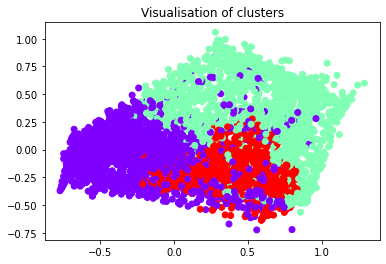

In [ ]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(X_principal)
plt.scatter(X_principal.a,X_principal.b, c=clust_labels, cmap ='rainbow')
plt.title('Visualisation of clusters')

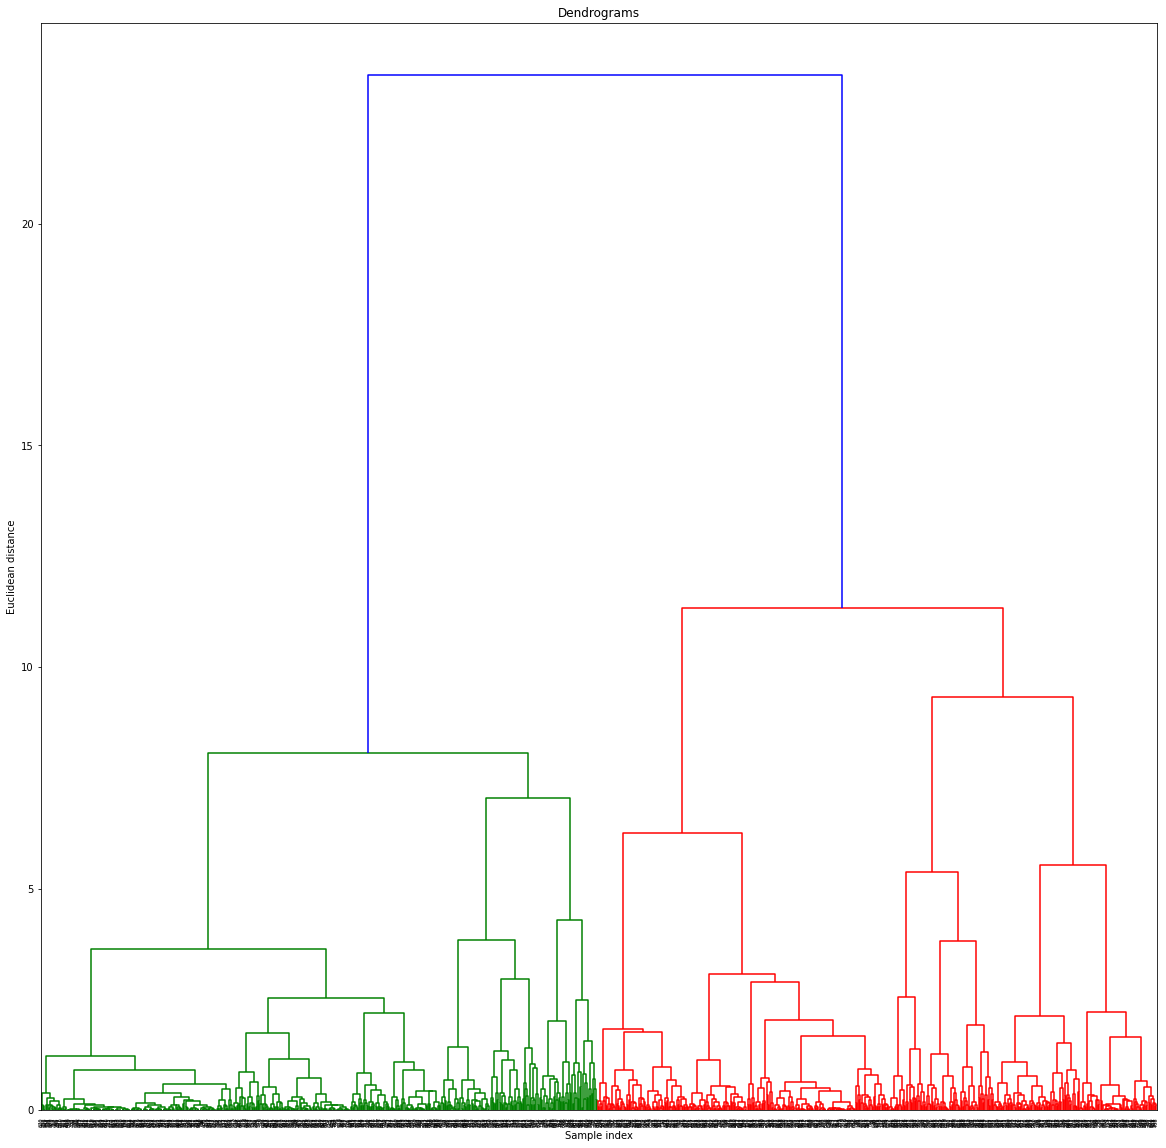

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
Dendrogram = shc.dendrogram(shc.linkage(X_principal[1:1000], method ='ward')) 

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for i in [2,3,4]:
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
    print(score)

2
0.38672161289328333
3
0.3723948225544862
4
0.3215079773343314


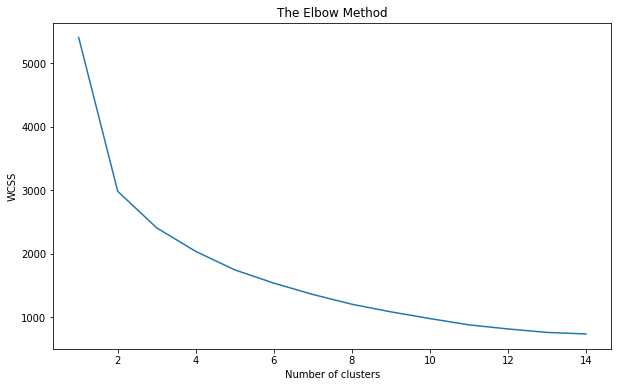

In [ ]:
plt.figure(figsize=(10,6))
from sklearn.cluster import KMeans   #Importing our clustering algorithm: KMeans
wcss = []
for i in range(1, 15):
    #Cluster our data by choosing 5 as number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(X_principal)
kmeans.cluster_centers_

array([[ 0.5399663 ,  0.51424247,  0.11767963,  0.05476427,  0.03780389],
       [-0.48936039, -0.00653768,  0.00651941, -0.01005194,  0.00159835],
       [ 0.55361833, -0.25239017, -0.07135677, -0.01100479, -0.02208145]])

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels[:8]

,0
0,1
1,1
2,0
3,1
4,1
5,2
6,0
7,2


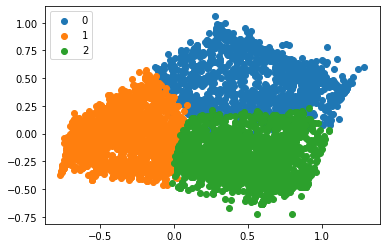

In [ ]:
u_labels = np.unique(y_kmeans)
 
#plotting the results:
label= y_kmeans
for i in u_labels:
    plt.scatter(X_principal.a[label == i] , X_principal.b[label == i] , label = i)
plt.legend()
plt.show()

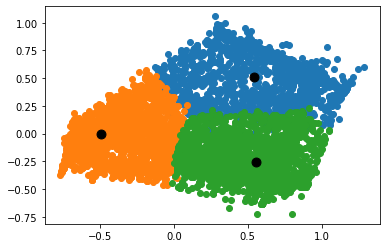

In [ ]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(X_principal.a[label == i] , X_principal.b[label == i] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.5399663 ,  0.51424247,  0.11767963,  0.05476427,  0.03780389],
       [-0.48936039, -0.00653768,  0.00651941, -0.01005194,  0.00159835],
       [ 0.55361833, -0.25239017, -0.07135677, -0.01100479, -0.02208145]])

In [ ]:
for i in range(2 , 8):
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_Norm)
    score = silhouette_score(df_Norm, kmeans.labels_, metric='euclidean')
    print(score)

2
0.29494149478216136
3
0.3222305054180305
4
0.34264229240042554
5
0.35988855201960834
6
0.35950728415231636
7
0.3223055060935165


In [ ]:
for i in range(2 , 8):
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_std)
    score = silhouette_score(df_std, kmeans.labels_, metric='cityblock')
    print(score)

2
0.2790445284715591
3
0.28673898987597274
4
0.2444837256308082
5
0.2327312592198245
6
0.21066078144803535
7
0.2057748737703431


## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## Euclidean distance

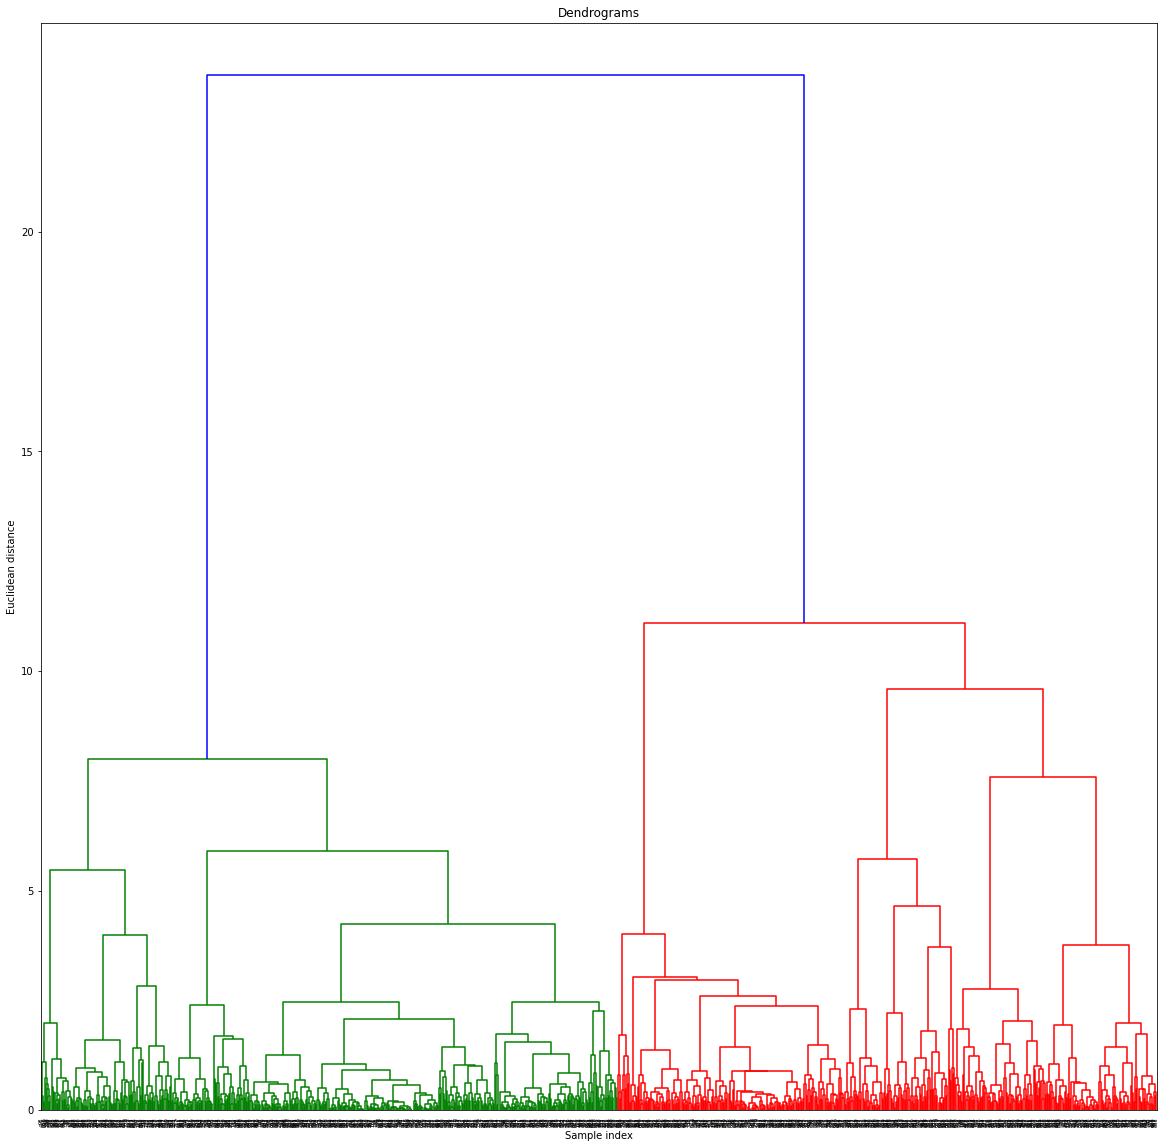

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='ward'))

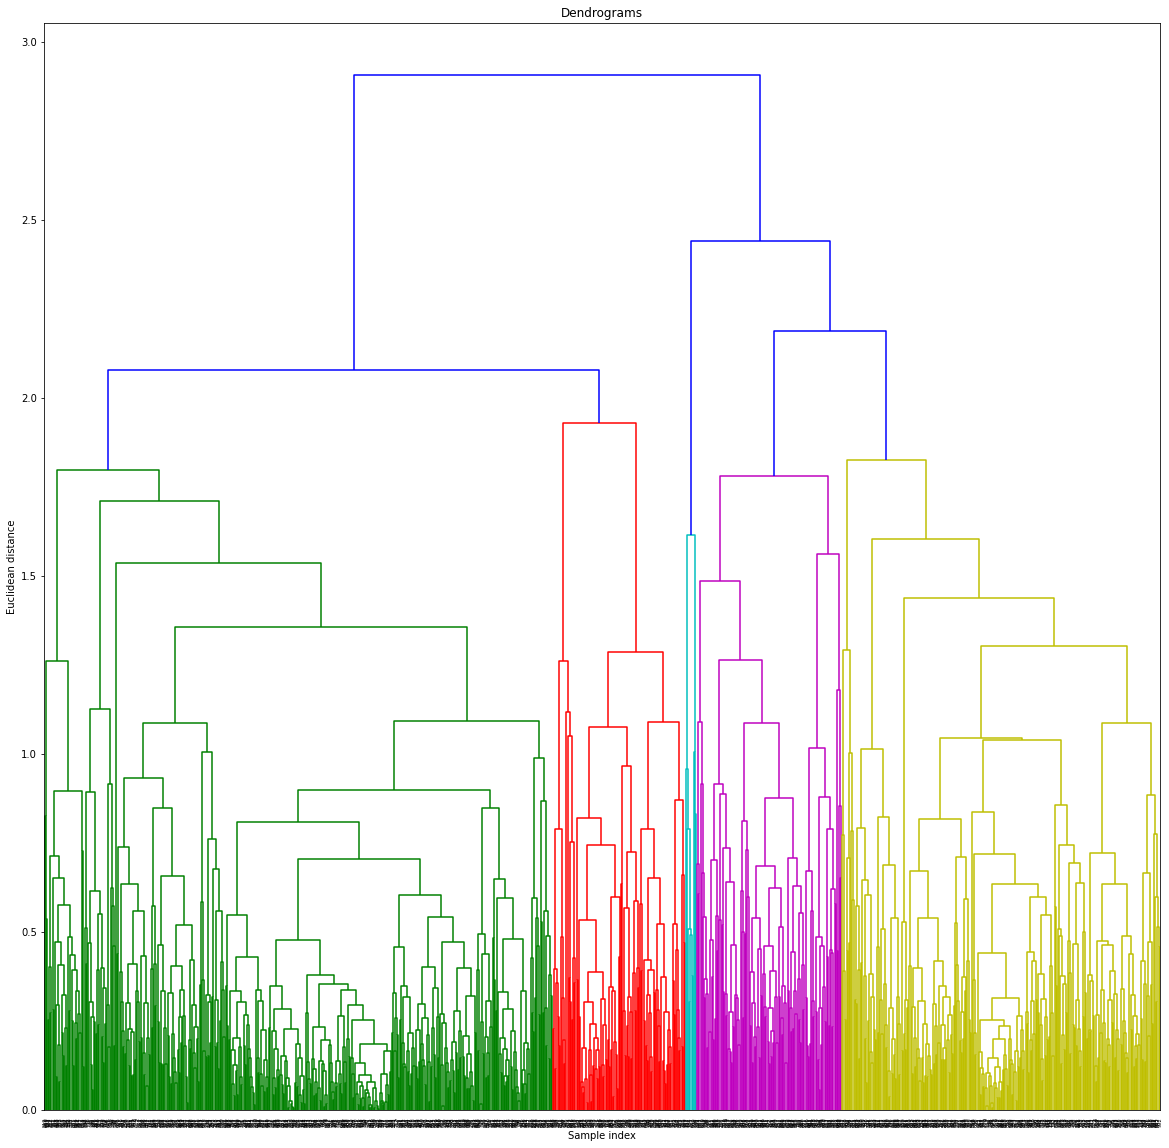

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='complete'))

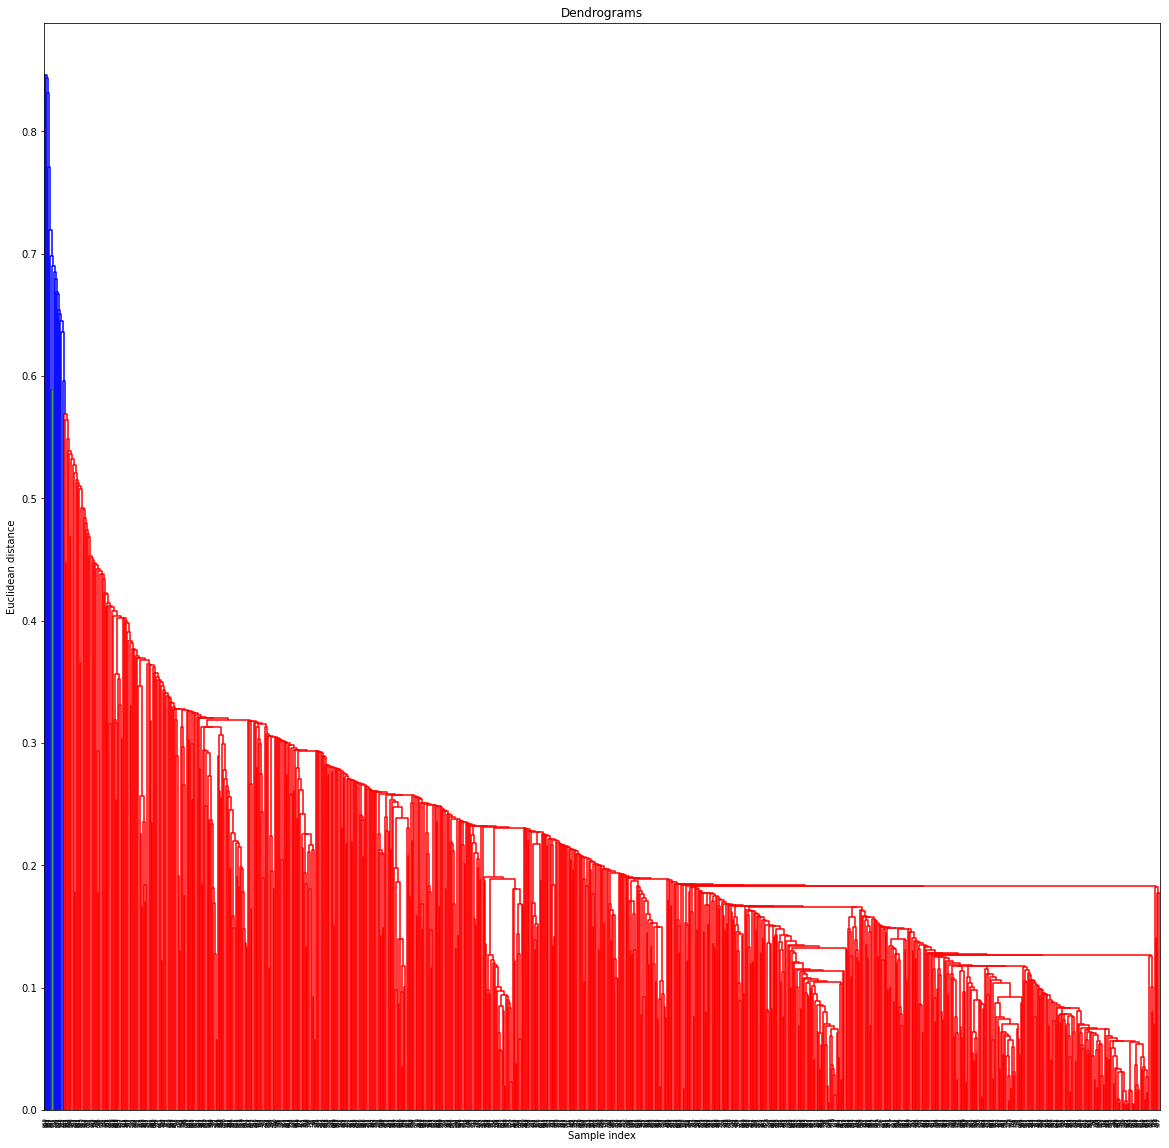

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='single'))

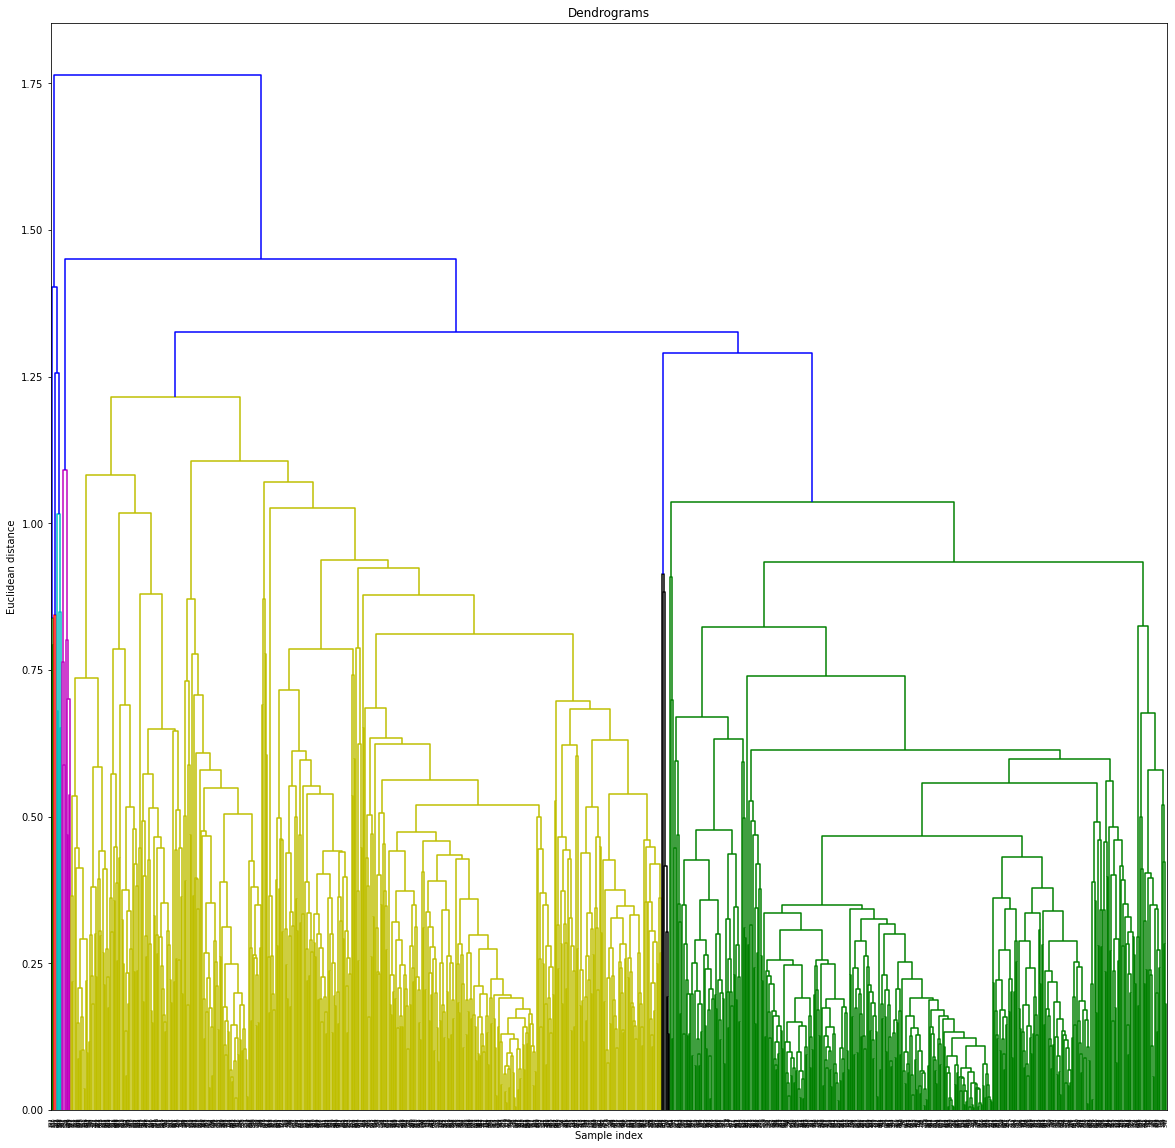

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='average') )

## Manhattan distance

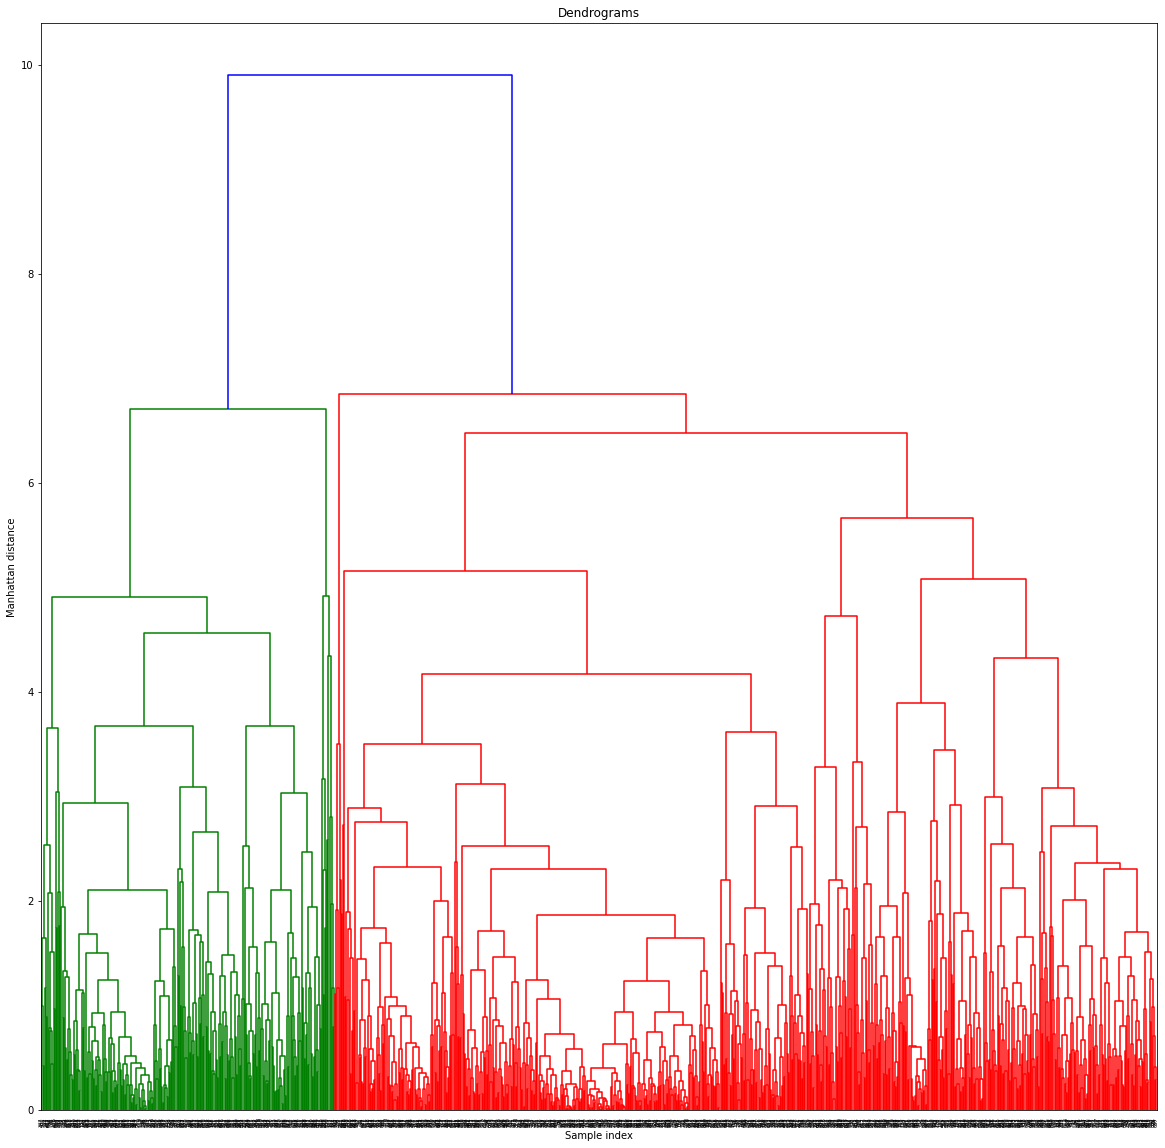

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Manhattan distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='complete',metric='cityblock'))

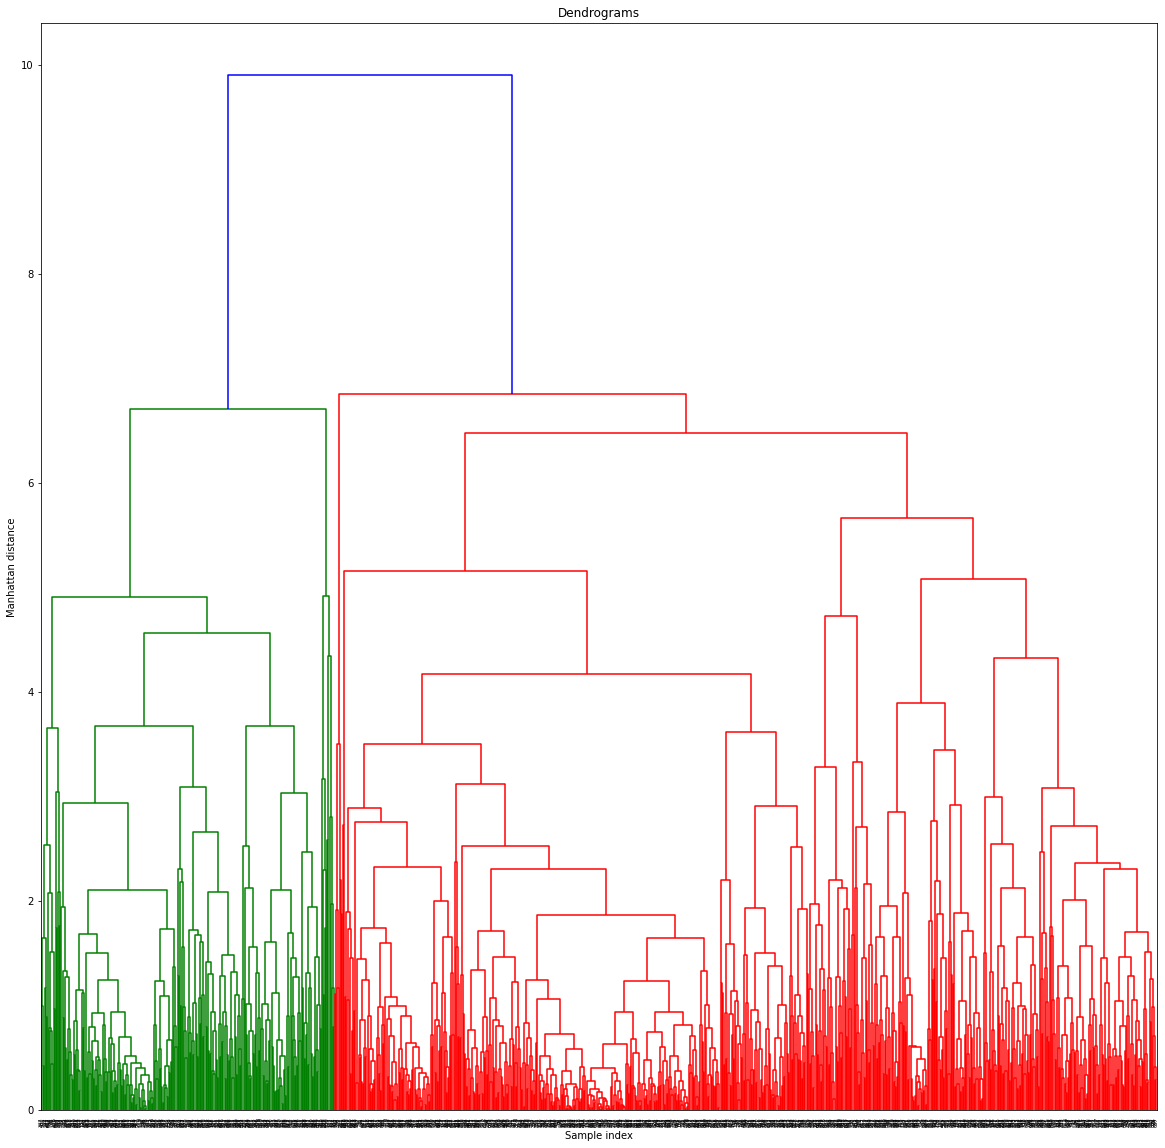

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Manhattan distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='complete',metric='cityblock'))

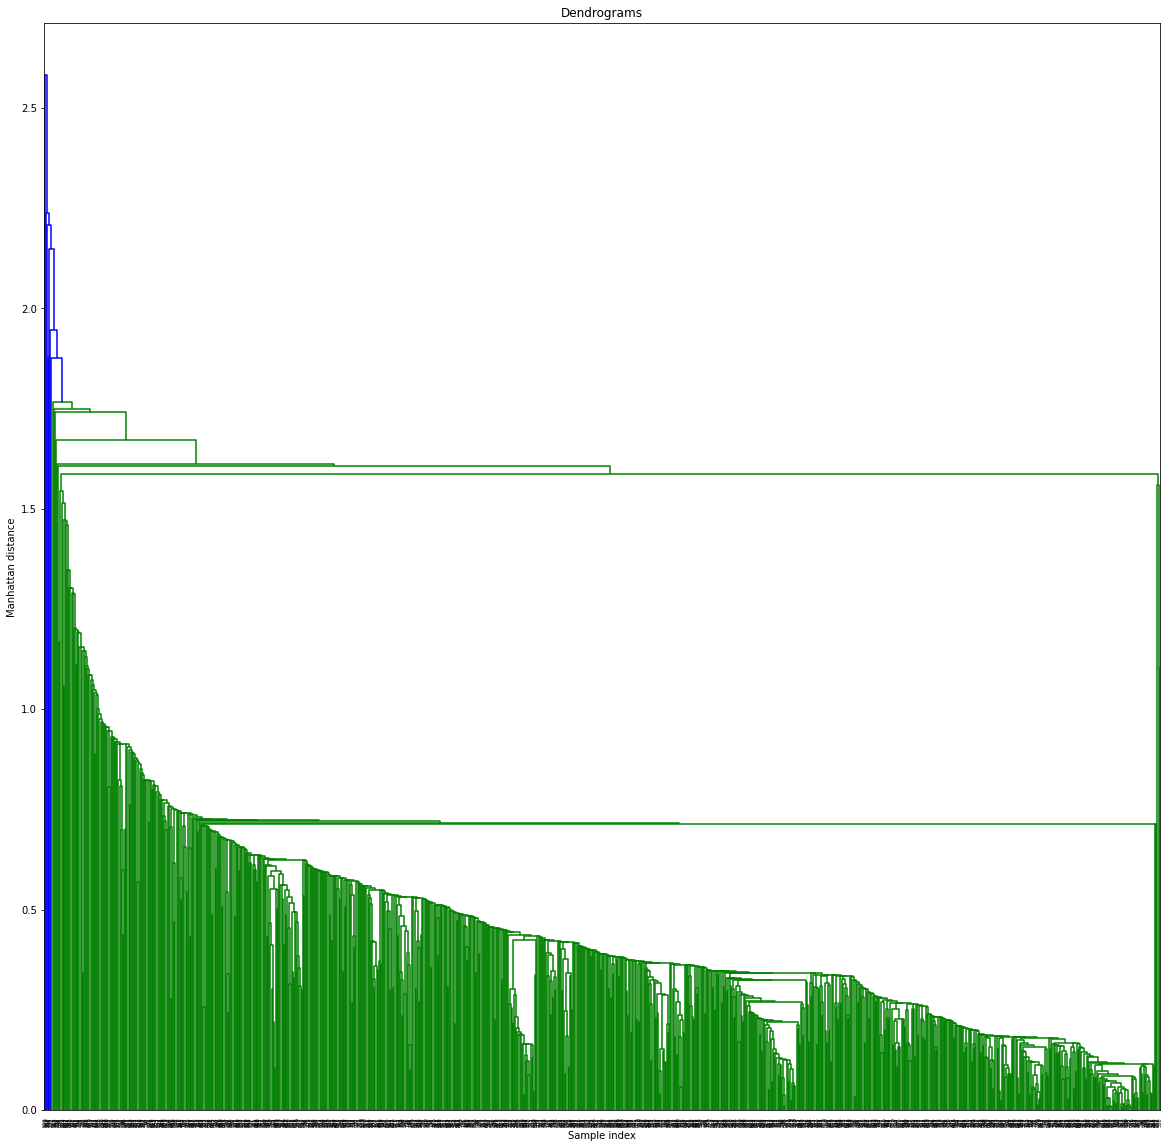

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Manhattan distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='single',metric='cityblock'))

## Mahalanobis distance

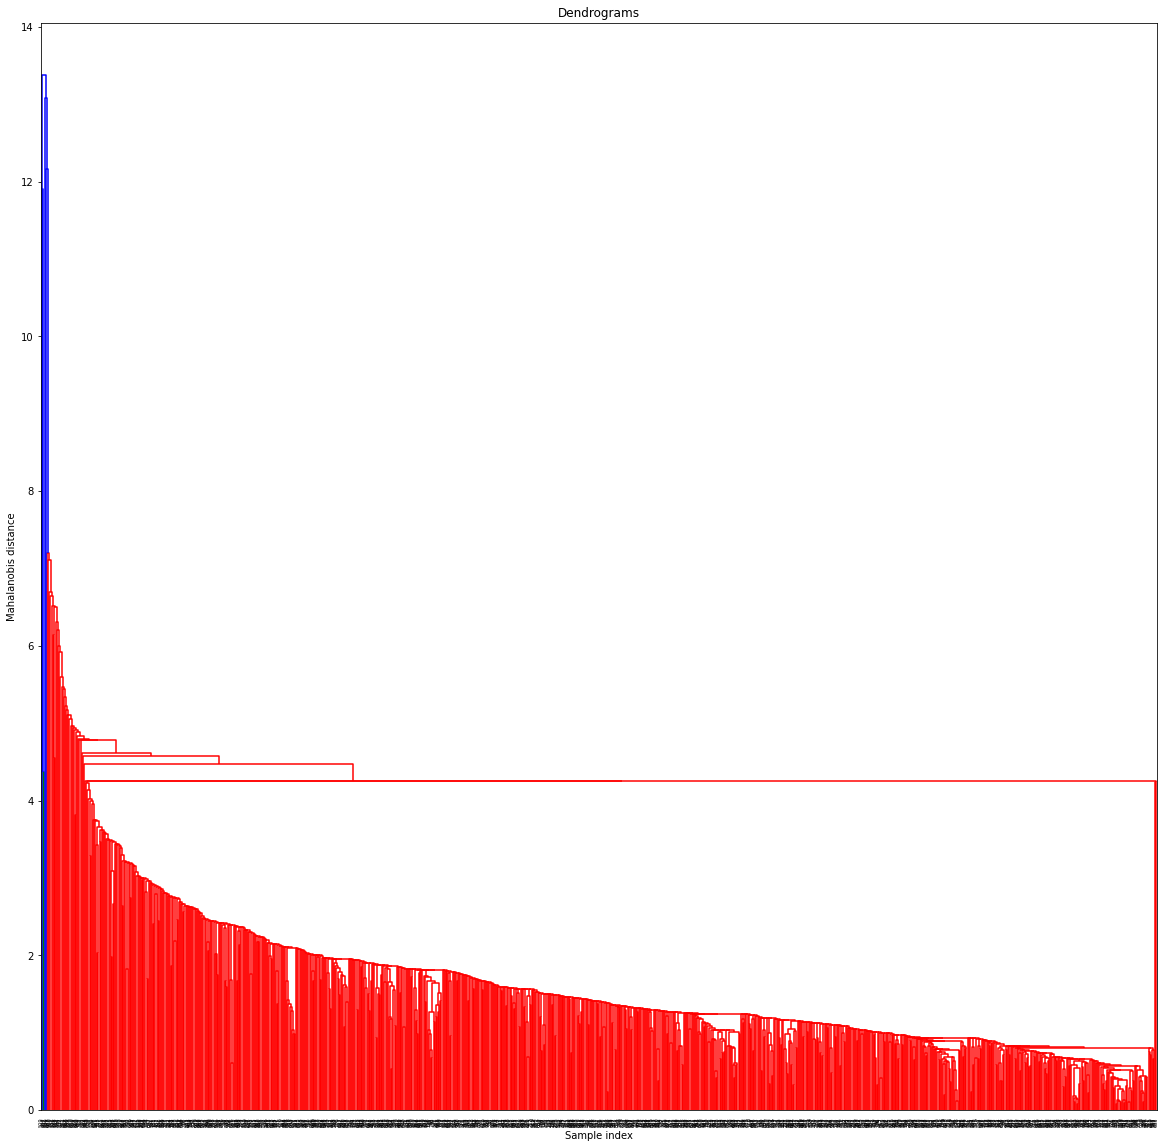

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Mahalanobis distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='single',metric='Mahalanobis'))

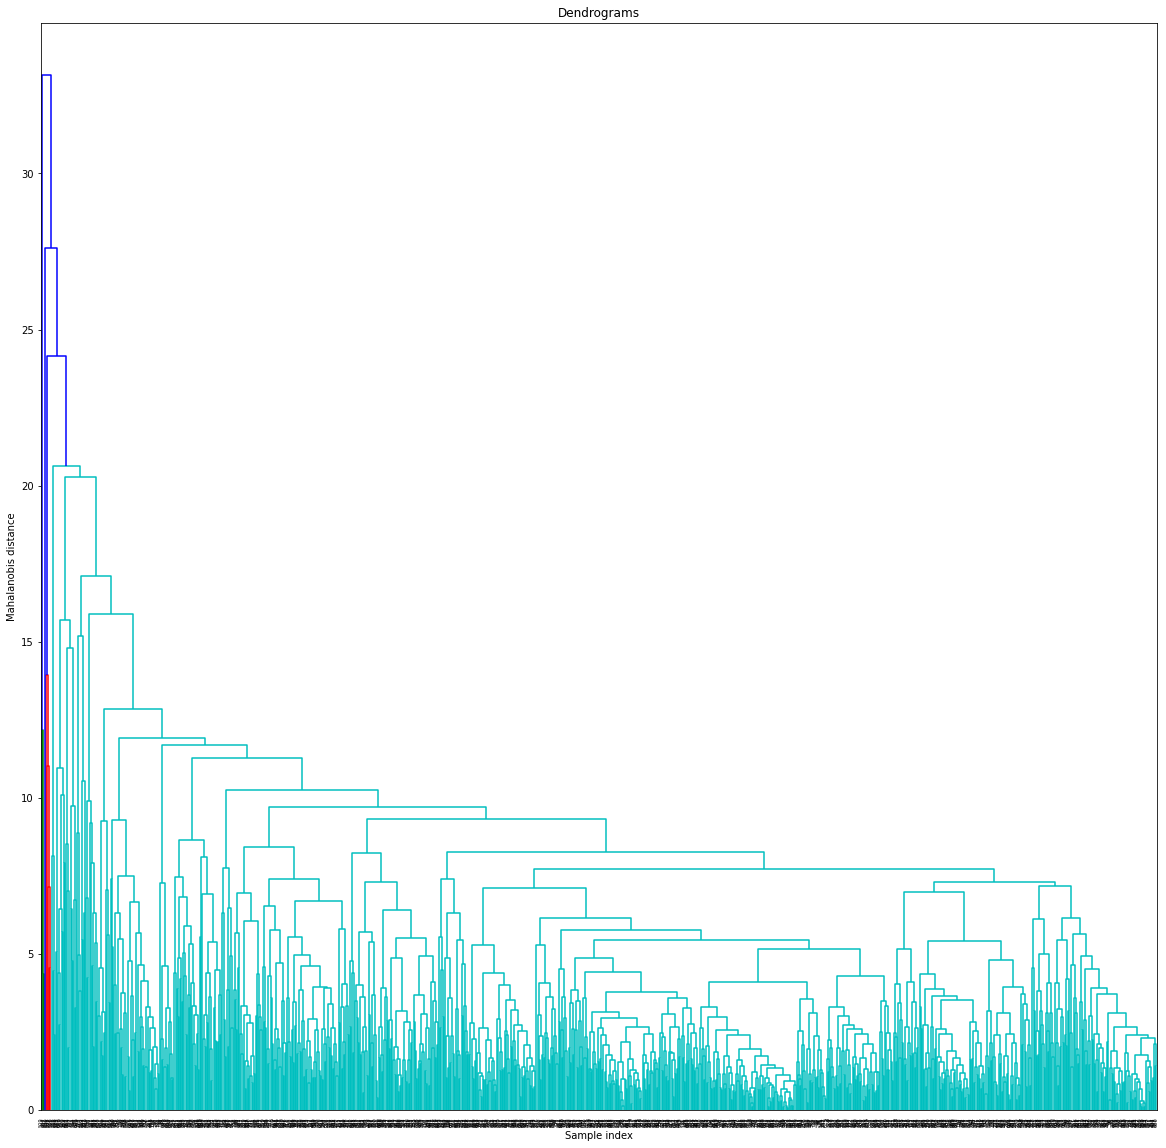

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Mahalanobis distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='complete',metric='Mahalanobis'))

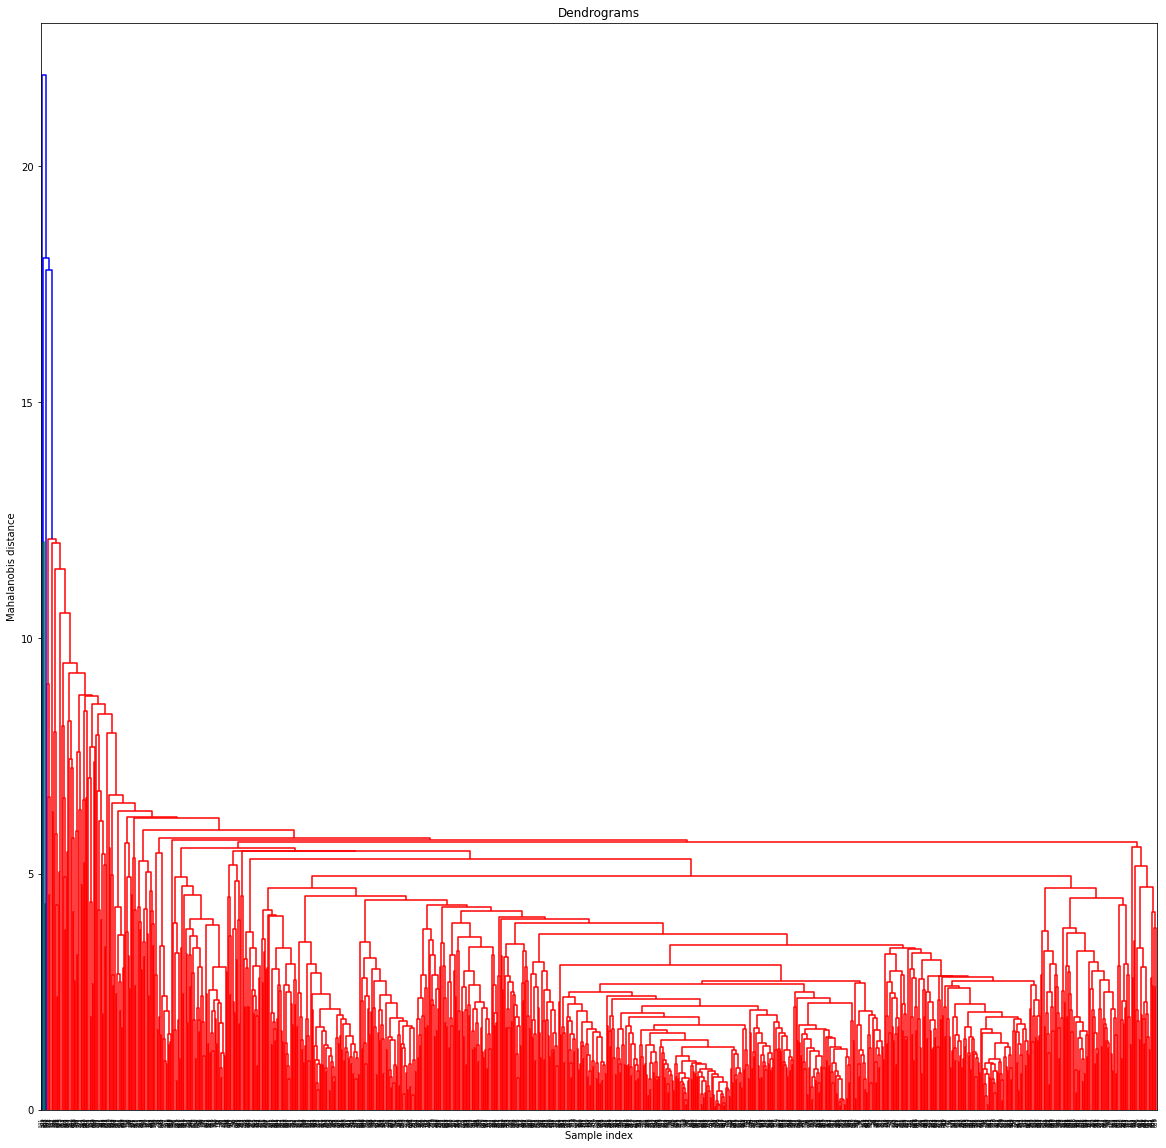

In [ ]:
plt.figure(figsize =(20, 20)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Mahalanobis distance')
Dendrogram = shc.dendrogram(shc.linkage(df_scaled[1:1000], method ='average',metric='Mahalanobis'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for i in [2 , 3 , 4 , 5 , 6 , 7]:
    print(i)
    agg = AgglomerativeClustering(n_clusters= i , linkage='ward' , affinity='euclidean').fit(df_scaled)
    print("sillhouette score  = " , silhouette_score(df_scaled , agg.labels_))
    

2
sillhouette score  =  0.35542241225623145
3
sillhouette score  =  0.3336350894872987
4
sillhouette score  =  0.2546893376571295
5
sillhouette score  =  0.22830233607836653
6
sillhouette score  =  0.233004868032195
7
sillhouette score  =  0.24210689979661917


In [ ]:
pd.DataFrame(agg.labels_).value_counts()

3    2663
1    1524
0    1297
5    1290
2     840
4     669
6     667
dtype: int64

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
object1 = KMeans(df_scaled ,init='k-means++', random_state=1)
Kmeans_clustering = object1.copy_x

In [ ]:
object1

KMeans(n_clusters=          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001   0.002148           0.818182   0.001945          0.000000   
C10002   0.168169           0.909091   0.000000          0.000000   
C10003   0.131026           1.000000   0.015766          0.018968   
C10004   0.087521           0.636364   0.030567          0.036775   
C10005   0.042940           1.000000   0.000326          0.000393   
...           ...                ...        ...               ...   
C19186   0.001496           1.000000   0.005936          0.000000   
C19187   0.001007           1.000000   0.006118          0....
C10003       0.248748  0.012264          0.008210          0.000000     1.0  
C10004       0.248748  0.000000          0.011310          0.000000     1.0  
C10005       0.038397  0.013374          0.003204          0.000000     1.0  
...               ...       ...               ...               

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [ ]:
for i in range(8 , 12):
    KMeans(n_clusters=i).fit(df_scaled)
    print(silhouette_score(df_scaled, kmeans.labels_))

0.23611969221403575
0.23611969221403575
0.23611969221403575
0.23611969221403575


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_scaled)
print(silhouette_score(df_scaled, kmeans.labels_))
kmeans.labels_

0.3374009877234517


array([5, 5, 6, ..., 1, 1, 1], dtype=int32)

## DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
pca = PCA(n_components= 3 , random_state=40)
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(8950, 3)

In [ ]:
agglomer = AgglomerativeClustering(n_clusters= 2 , affinity= 'euclidean' ,linkage= 'ward')
agglomer.fit(df_pca)
print(silhouette_score(df_pca , agglomer.labels_))

0.4659509083803636


In [ ]:
agglomer = AgglomerativeClustering(n_clusters= 2 , affinity= 'euclidean' ,linkage= 'average')
agglomer.fit(df_pca)
print(silhouette_score(df_pca , agglomer.labels_))

0.48104468967469144


In [ ]:
agglomer = AgglomerativeClustering(n_clusters= 2 , affinity= 'euclidean' ,linkage= 'complete')
agglomer.fit(df_pca)
print(silhouette_score(df_pca , agglomer.labels_))

0.3296605914066097


In [ ]:
agglomer = AgglomerativeClustering(n_clusters= 2 , affinity= 'cityblock' ,linkage= 'complete')
agglomer.fit(df_pca)
print(silhouette_score(df_pca , agglomer.labels_))

0.28058357093577746


In [ ]:
df2 = df_scaled
df2.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [ ]:
d3 = df_Norm
d3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
C10002,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
C10003,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
C10004,0.207829,0.000079,0.186921,0.186921,0.000000,0.025661,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.000000,0.001496
C10005,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306
C19187,0.013553,0.000707,0.211952,0.000000,0.211952,0.000000,0.000707,0.000000,0.000589,0.000000,0.000000,0.004239,0.706507,0.194898,0.610568,0.000000,0.004239
C19188,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840


In [ ]:
b

In [ ]:
db1_new = DBSCAN(eps = 0.5 , min_samples= 30 ).fit(d3)

In [ ]:
d3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,assignments
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546,0
C10002,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101,0
C10003,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495,0
C10004,0.207829,0.000079,0.186921,0.186921,0.000000,0.025661,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.000000,0.001496,0
C10005,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306,0
C19187,0.013553,0.000707,0.211952,0.000000,0.211952,0.000000,0.000707,0.000000,0.000589,0.000000,0.000000,0.004239,0.706507,0.194898,0.610568,0.000000,0.004239,0
C19188,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
db1 = DBSCAN(eps = 0.4 , min_samples= 30 ).fit(d3)

In [ ]:
db1_new = DBSCAN(eps = 0.5 , min_samples= 30 ).fit(d3)

In [ ]:
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d3["assignments"] = db1.labels_

(
    ggplot(d2_clustered, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
    theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 30"))


NameError: ignored

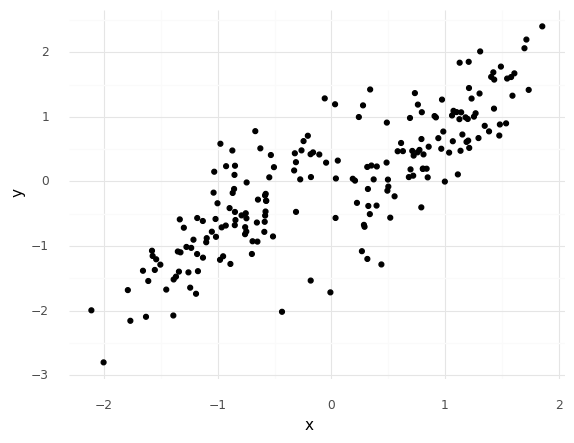

<ggplot: (8755850218249)>

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [ ]:
d1

,x,y
0,1.209113,1.852323
1,0.352802,0.246308
2,1.204704,0.632357
3,0.735551,1.367752
4,1.153633,0.726711
...,...,...
195,-1.298059,-0.716771
196,-1.019120,-0.581533
197,-0.504918,0.220737
198,-0.753013,-0.492785


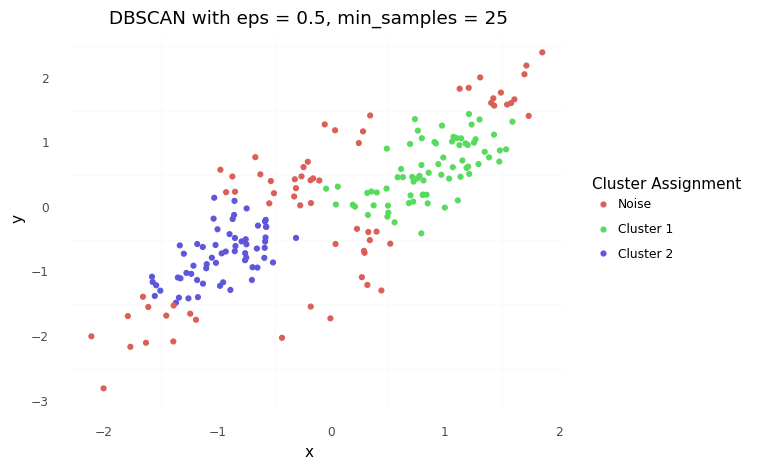

<ggplot: (8755850042937)>

In [ ]:
# dbscan and plot
db1 = DBSCAN(eps = 0.5, min_samples =30).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [ ]:
d4 = d1.loc[(d1.assignments >= 0)]
print(silhouette_score(d4[['x' , 'y']] , d4['assignments']))

print(silhouette_score(d4 , d4['assignments']))

0.6861881840551894
0.7194403141373664


In [ ]:
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(DB1.labels_)))]

df2["assignments"] = DB1.labels_

In [1]:
# # dbscan and plot
# db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(df_scaled)

# labsList = ["Noise"]
# labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

# df_scaled["assignments"] = db1.labels_

# (plt.scatter(df_scaled, y = "y", color = "factor(assignments)"))
# scale_color_discrete(name = "Cluster Assignment", labels = labsList) + theme(panel_grid_major = element_blank()) + labs(title = "DBSCAN with eps = 0.5, min_samples = 25")

In [2]:
# df_cluster = df_pca.loc[{df_pca.assignments >= 0}]
# print(silhouette_score(d2_clustered[['x', 'y']] , d2_clustered['assginments'])

# print(silhouette_score[df_pca] , df_pca['assignments']))

## <b> Gaussian Mixture <b>

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [ ]:
gausMix = GaussianMixture(n_components= 2 , random_state= 0 ).fit(X_principal)
labels = gausMix.predict(X_principal)

In [ ]:
X_emb = TSNE(n_components= 2 , learning_rate= 130 , init = 'pca').fit_transform(X_principal)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


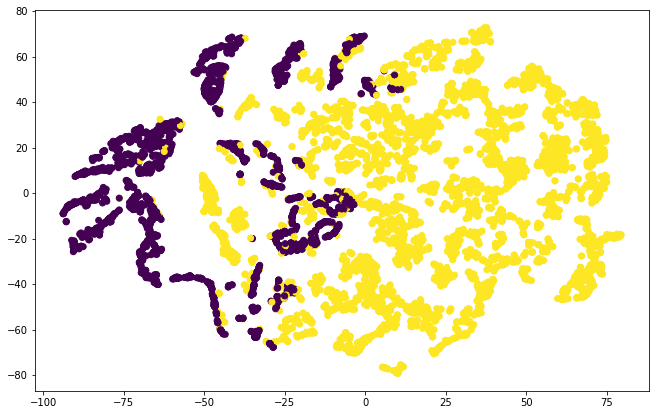

In [ ]:
plt.figure(figsize = (11 , 7))
plt.scatter(X_emb[: , 0] , X_emb[ :  , 1] , c = labels)

In [ ]:
gausMix = GaussianMixture(n_components= 3 , random_state= 0 ).fit(X_principal)
labels = gausMix.predict(X_principal)

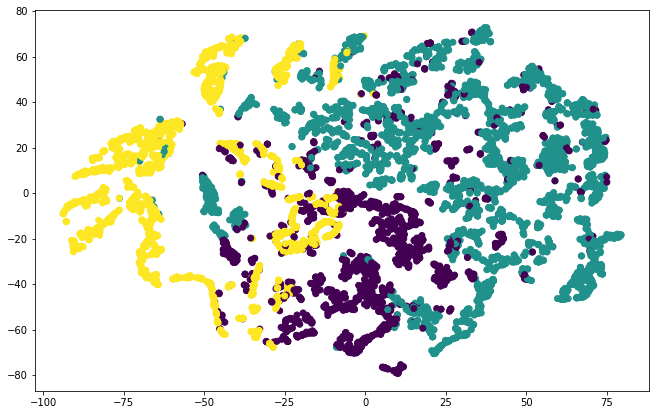

In [ ]:
plt.figure(figsize = (11 , 7))
plt.scatter(X_emb[: , 0] , X_emb[ :  , 1] , c = labels)

In [ ]:
gausMix = GaussianMixture(n_components= 4 , random_state= 0 ).fit(X_principal)
labels = gausMix.predict(X_principal)

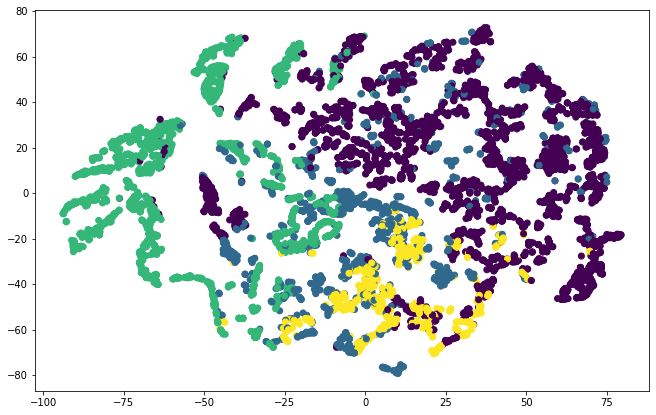

In [ ]:
plt.figure(figsize = (11 , 7))
plt.scatter(X_emb[: , 0] , X_emb[ :  , 1] , c = labels)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
m0,m1,m2,m3 = gausMix.means_
s0,s1,s2,s3 = gausMix.covariances_

from scipy.stats import multivariate_normal

pxy0 = multivariate_normal.pdf(X_principal,mean = m0, cov = s0).reshape(-1,1)
pxy1 = multivariate_normal.pdf(X_principal,mean = m1, cov = s1).reshape(-1,1)
pxy2 = multivariate_normal.pdf(X_principal,mean = m2, cov = s2).reshape(-1,1)
pxy3 = multivariate_normal.pdf(X_principal,mean = m3, cov = s3).reshape(-1,1)


pxy = np.hstack([pxy0,pxy1, pxy2 , pxy3])

py = gausMix.weights_
px = pxy @ py

In [ ]:
print("number of anomalies : " + str((px<0.2).sum()))

number of anomalies : 1446
